# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import time
from collections import deque

from unityagents import UnityEnvironment
import numpy as np
import torch

import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='C:/Users/rovaa/deep-reinforcement-learning/p2_continuous-control/Reacher_Windows_x86_64/Reacher.exe')
#env = UnityEnvironment(file_name="C:/Users/rovaa/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.30408478e+00 -1.00000000e+00
 -4.92529202e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.33014059e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### 4.1 Import and instantiate the agent 
In the following cell of code the agent is imported by `ddpg_agent` and it it instantiated. 

In [6]:
import ddpg_agent
import torch.optim as optim
import importlib
import time

importlib.reload(ddpg_agent)

agent = ddpg_agent.Agent(state_size=state_size, action_size=action_size, random_seed = 10)

#### 4.2 Test de agent

In [ ]:
# An untrained agent

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

for j in range(100):
    actions = agent.act(state)                # select an action
    env_info = env.step(actions)[brain_name]  # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break

print("Score: {}".format(score))

#### 4.3 Define the DDPG training function and train an agent

In [7]:
def ddpg(n_episodes=1000, max_t=10000, print_every=1, save_every=100, ckp_critic='checkpoint_critic.pth',ckp_actor = 'checkpoint_actor.pth'):
    
    """DDQN Algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing information throughout iteration 
        save_every (int): number of episodes to save actor-critic weights
        ckp_critic (str): path to save weights of critic NN
        ckp_actor(str): path to save weights of actor NN
        """
        
    
    scores = []
    movAverages = []
    averages = []
    scores_deque = deque(maxlen=100) # The goal to solve the environment is obtain a moving average over of 30, over the last 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        start_time = time.time()
        for t in range(max_t):
            action = agent.act(state)          # select an action
       
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # take step with agent (including learning)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        
        duration = time.time() - start_time
        scores_deque.append(score)       # save most recent score on the scores deque (lenght = 100)
        scores.append(score)             # save most recent score
        movAverages.append(np.mean(scores_deque))  # save mean of scores of the last 100 episodes
        averages.append(np.mean(scores))  # save mean of scores

        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode: {} ({}sec)\tScore: {:.2f}\tMovAverage(100): {:.2f} \tFullAverage: {:.2f}'.format(i_episode, round(duration), score,np.mean(scores_deque), np.mean(scores)))
            
        if i_episode % save_every == 0:
            torch.save(agent.actor_local.state_dict(), ckp_actor)
            torch.save(agent.critic_local.state_dict(), ckp_critic)
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), ckp_actor)
            torch.save(agent.critic_local.state_dict(), ckp_critic)
            break
            
    return scores, movAverages, averages 

Train the agent for a number of episodes: `n_episodes`

In [8]:
scores, movAverages, averages = ddpg(n_episodes = 500)

Episode: 1 (15sec)	Score: 0.02	MovAverage(100): 0.02 	FullAverage: 0.02
Episode: 2 (19sec)	Score: 0.65	MovAverage(100): 0.33 	FullAverage: 0.33
Episode: 3 (20sec)	Score: 0.16	MovAverage(100): 0.28 	FullAverage: 0.28
Episode: 4 (20sec)	Score: 0.82	MovAverage(100): 0.41 	FullAverage: 0.41
Episode: 5 (20sec)	Score: 0.68	MovAverage(100): 0.47 	FullAverage: 0.47
Episode: 6 (20sec)	Score: 0.98	MovAverage(100): 0.55 	FullAverage: 0.55
Episode: 7 (20sec)	Score: 0.96	MovAverage(100): 0.61 	FullAverage: 0.61
Episode: 8 (20sec)	Score: 0.08	MovAverage(100): 0.54 	FullAverage: 0.54
Episode: 9 (20sec)	Score: 0.00	MovAverage(100): 0.48 	FullAverage: 0.48
Episode: 10 (20sec)	Score: 0.49	MovAverage(100): 0.48 	FullAverage: 0.48
Episode: 11 (20sec)	Score: 0.58	MovAverage(100): 0.49 	FullAverage: 0.49
Episode: 12 (20sec)	Score: 0.45	MovAverage(100): 0.49 	FullAverage: 0.49
Episode: 13 (20sec)	Score: 1.49	MovAverage(100): 0.57 	FullAverage: 0.57
Episode: 14 (21sec)	Score: 1.15	MovAverage(100): 0.61 	FullA

Episode: 113 (20sec)	Score: 11.98	MovAverage(100): 8.88 	FullAverage: 7.92
Episode: 114 (20sec)	Score: 17.08	MovAverage(100): 9.04 	FullAverage: 8.00
Episode: 115 (21sec)	Score: 22.81	MovAverage(100): 9.26 	FullAverage: 8.13
Episode: 116 (21sec)	Score: 22.52	MovAverage(100): 9.49 	FullAverage: 8.26
Episode: 117 (21sec)	Score: 18.51	MovAverage(100): 9.67 	FullAverage: 8.35
Episode: 118 (20sec)	Score: 18.10	MovAverage(100): 9.84 	FullAverage: 8.43
Episode: 119 (21sec)	Score: 15.89	MovAverage(100): 10.00 	FullAverage: 8.49
Episode: 120 (21sec)	Score: 22.44	MovAverage(100): 10.20 	FullAverage: 8.61
Episode: 121 (21sec)	Score: 27.00	MovAverage(100): 10.46 	FullAverage: 8.76
Episode: 122 (22sec)	Score: 23.23	MovAverage(100): 10.67 	FullAverage: 8.88
Episode: 123 (20sec)	Score: 17.11	MovAverage(100): 10.81 	FullAverage: 8.94
Episode: 124 (20sec)	Score: 29.69	MovAverage(100): 11.10 	FullAverage: 9.11
Episode: 125 (21sec)	Score: 22.05	MovAverage(100): 11.28 	FullAverage: 9.22
Episode: 126 (20se

Episode: 220 (19sec)	Score: 23.70	MovAverage(100): 29.32 	FullAverage: 18.02
Episode: 221 (19sec)	Score: 38.04	MovAverage(100): 29.43 	FullAverage: 18.11
Episode: 222 (19sec)	Score: 33.23	MovAverage(100): 29.53 	FullAverage: 18.18
Episode: 223 (19sec)	Score: 33.31	MovAverage(100): 29.69 	FullAverage: 18.25
Episode: 224 (20sec)	Score: 36.01	MovAverage(100): 29.76 	FullAverage: 18.33
Episode: 225 (19sec)	Score: 37.52	MovAverage(100): 29.91 	FullAverage: 18.41
Episode: 226 (19sec)	Score: 27.40	MovAverage(100): 29.97 	FullAverage: 18.45
Episode: 227 (19sec)	Score: 33.76	MovAverage(100): 30.16 	FullAverage: 18.52

Environment solved in 227 episodes!	Average Score: 30.16


### 5. Plot the results


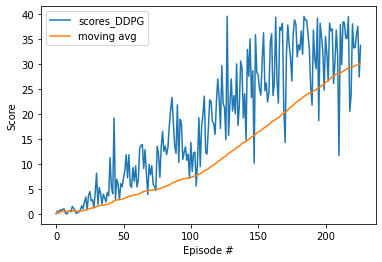

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores_DDPG')
plt.plot(np.arange(len(scores)), movAverages,  label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()


In [ ]:
env.close()